# Esercizio 8

The variational principle in Quantum Mechanics states that the expectation value of the Hamiltonian over a (good) trial quantum state has the ground state energy $E_0$ as lower bound:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on two variational parameters: $\sigma$ and $\mu$

### Exercise 08.1

Write a Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$. By using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
Note that to measure $\langle {\hat H} \rangle_T$ you need the analytical calculation of:
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

## Solution
The expectation value of the Hamiltonian \( H = K + V \) can be expressed as the following integral:

$$\langle \hat{H} \rangle_T = \frac{\int dx\, \Psi_T^*(x)\,\hat{H}\,\Psi_T(x)}{\int dx\, |\Psi_T(x)|^2}= \int dx\, \frac{|\Psi_T(x)|^2}{\int dx\,|\Psi_T(x)|^2}\, \frac{\hat{H}\Psi_T(x)}{\Psi_T(x)}.$$

Here, the operator $\hat{H}\psi$ is given by:

$$
\frac{\hat{H}\psi}{\Psi_T^{\sigma,\mu}(x)} 
= -\frac{\hbar^2}{2m}\,
\frac{\frac{\partial^2}{\partial x^2}\Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
+ \frac{\left(x^4 - \tfrac{5}{2}x^2\right)\Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}.
$$

Using the Metropolis algorithm, we sample the probability density 
$ |\Psi_T(x)|^2 $, and evaluate the expectation value of the Hamiltonian by averaging the quantity
$\hat{H}\Psi_T(x)/\Psi_T(x)$ over the sampled positions.

### Simulation setup

- $M = 100000 $: total Monte Carlo steps  
- $ N = 100 $: number of blocks    
- $ \mu = 2 $  
- $ \sigma = 1$ 

With these parameters we obtained the results reported for $\sigma = 1$ and $\mu = 2$.


In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh


<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_9975/3003910220.py:6: SyntaxWarning: invalid escape sequence '\m'
  plt.title("Integral value with $\mu = 0, \sigma = 1$")
/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_9975/3003910220.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('./08.1/output.dat', delim_whitespace=True)


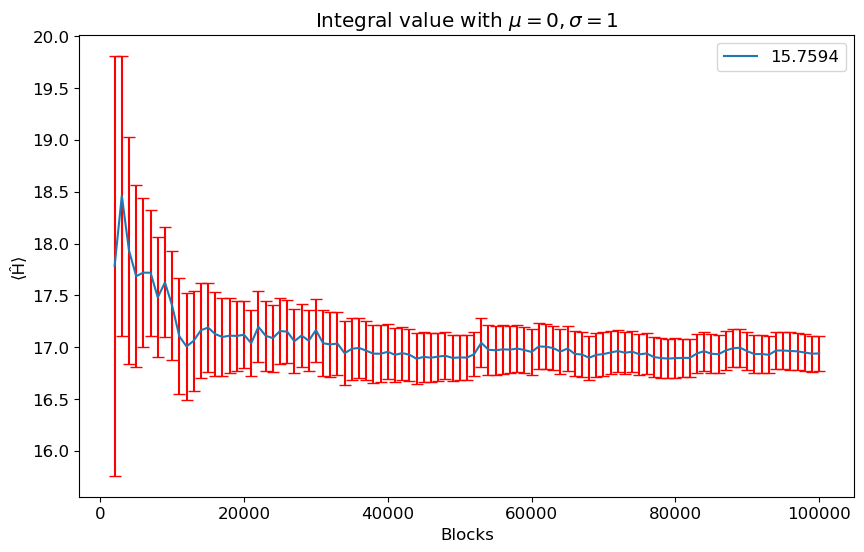

In [181]:
# Leggi il file output.dat
data = pd.read_csv('./08.1/output.dat', delim_whitespace=True)

# Crea un grafico (modifica le colonne in base ai dati del file)
data.plot(x = data.columns[0], y = data.columns[1], yerr = data.columns[2], ecolor='red', capsize=4)
plt.title("Integral value with $\mu = 0, \sigma = 1$")
plt.ylabel('⟨Ĥ⟩')
plt.xlabel('Blocks')
# Mostra il grafico
plt.show()

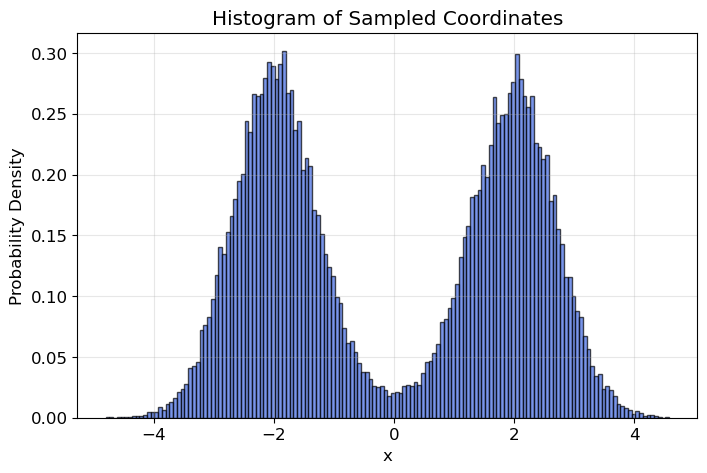

In [182]:
# Carica i dati dal file coord.dat
data1 = np.loadtxt('./08.1/coord.dat')

plt.figure(figsize=(8,5))
plt.hist(data1[:, 1], bins=150, density=True, alpha=0.7, color='royalblue', edgecolor='black')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Histogram of Sampled Coordinates')
plt.grid(alpha=0.3)
plt.show()

## Esercizio 8.2

To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, extend your Variational Monte Carlo code to face the variational optimization problem via a Simulated Annealing (SA) algorithm.

Choose an appropriate starting temperature for your SA algorithm and an appropriate temperature-update-law to make the optimization work.

Compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved.
- Show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the SA steps of the algorithm
- you could also show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps
- show a picture of the estimation of $\langle {\hat H} \rangle_T$  and its statistical uncertainty as a function of the number of blocks/MC steps for the set of parameters which minimize $\langle {\hat H} \rangle_T$
- show also a picture **of the sampled** $|\Psi_T(x)|^2$ by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below the supplementary material).

After initializing all the required variables and data files for the subsequent graphical analysis, the algorithm enters a for loop implementing the simulated annealing (SA) procedure.
The first step consists in lowering the system temperature according to
```cpp
    beta += 0.1;
    T = 1./beta;
```
New candidate parameters are then generated through a Gaussian displacement around the currently occupied values:
```cpp
mu = mu_Old + rnd.Gauss(0, deltaMu * T);
sigma = sigma_Old + rnd.Gauss(0, deltaSigma * T);
```
The energy corresponding to these updated parameters is estimated via the Metropolis algorithm. After the data blocking procedure, one obtains the associated value of the energy. To complete the simulated annealing step, it is necessary to implement the acceptance criterion for the new parameters, defined as
```cpp
double alpha = min(1., exp(-beta * (energy - energy_Old)));
if(rnd.Rannyu() < alpha){
    counter++;
    mu_Old = mu;
    sigma_Old = sigma;
    energy_Old = energy;
    if (energy < best_energy){   
        best_energy = energy;
        best_energyError = energyError;
        bestMu = mu;
        bestSigma = sigma;
    }
}else{
    mu = mu_Old;
    sigma = sigma_Old;
}
```
This mechanism ensures the convergence of the simulated annealing algorithm.
Once the optimal parameters have been identified, they are employed to generate the final two plots: data blocking is applied again to estimate the energy, and the sampled positions are stored to produce the histogram of the probability distribution.

### Results
The system clearly evolves towards the minimum-energy configuration, as demonstrated by all the graphical results. This behavior is particularly evident in the trajectory within the parameter space: as the simulation progresses and the temperature decreases, the dynamics “freeze” around the region of the energy minimum.

The simulated annealing algorithm converges to an energy value slightly different from that obtained through the matrix diagonalization method. Nevertheless, the comparison of the wavefunction profiles shows a strong agreement: while some discrepancies remain—especially in the vicinity of the origin—the overall shape is very similar.

In many practical applications, approximate solutions are sufficient to capture the essential physical behavior. In this sense, the small difference observed between the two approaches is acceptable, and the results obtained through simulated annealing can be considered satisfactory.



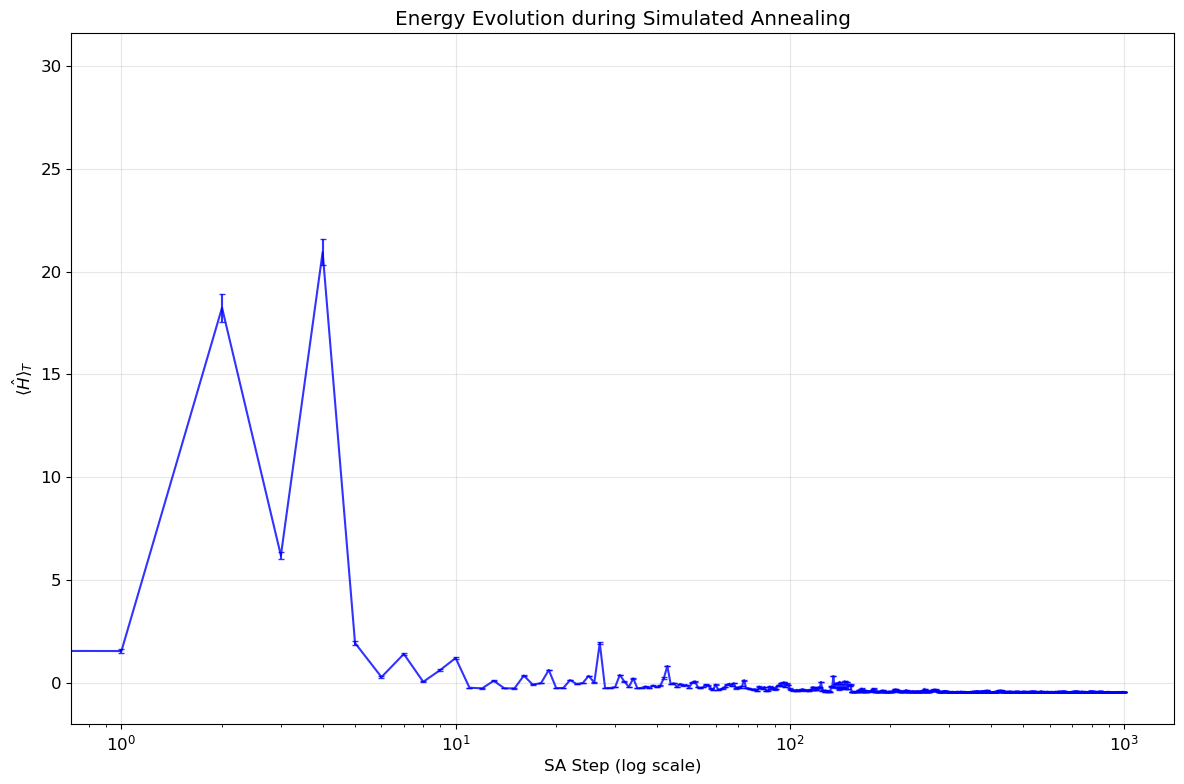

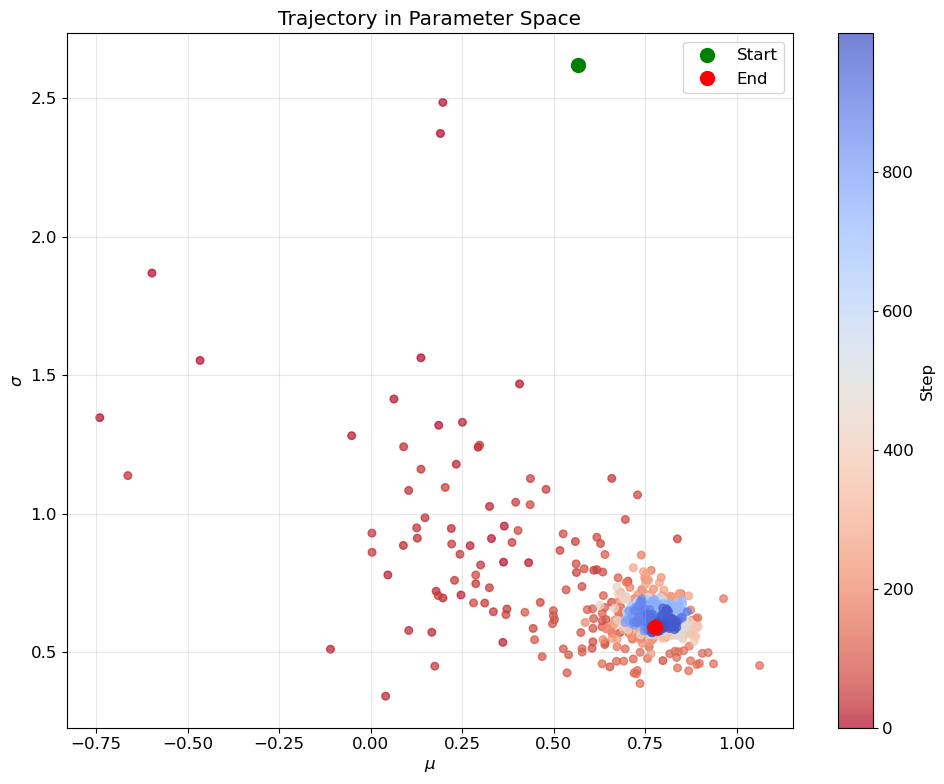

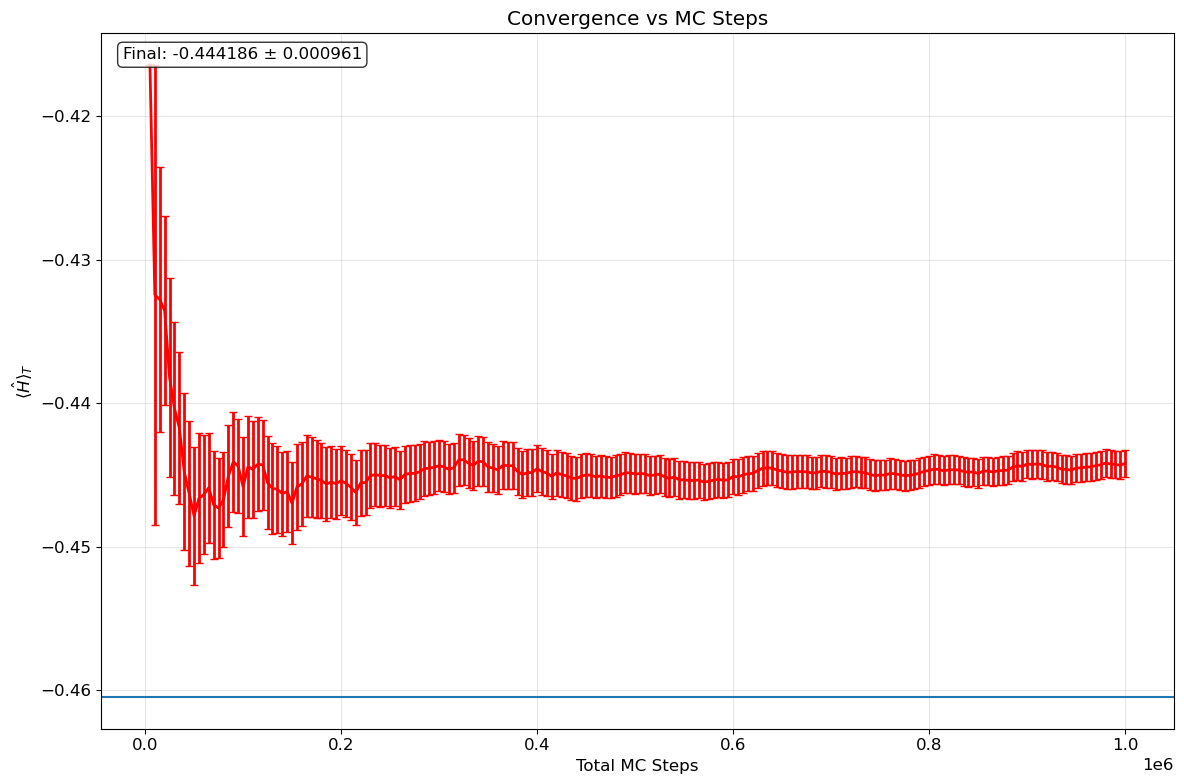

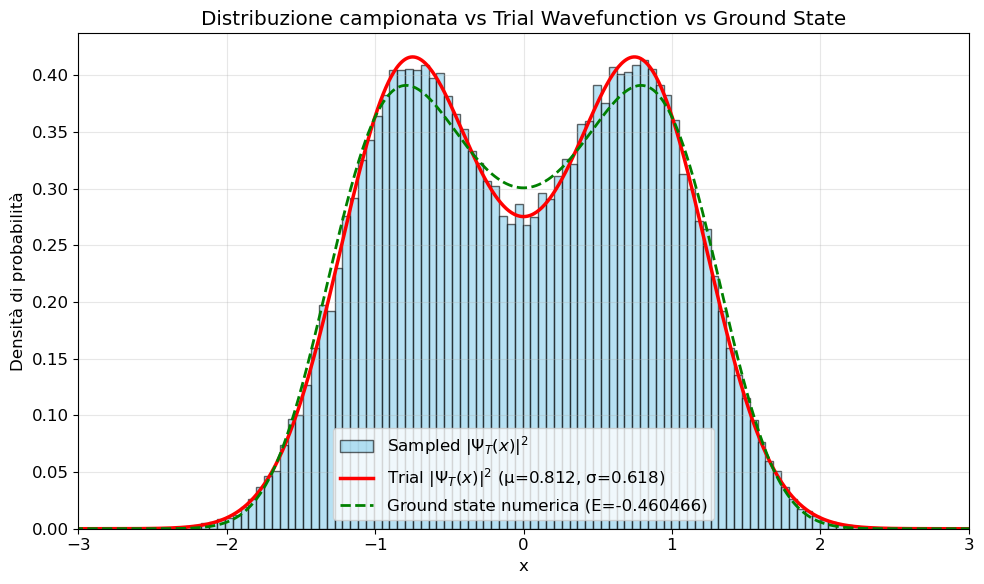

Ground state energy numerica: -0.4604658796923901


In [186]:
# Set matplotlib style for better plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

def harmonic_potential(x, k=1):
    """Harmonic oscillator potential V(x) = 0.5 * k * x^2"""
    return 0.5 * k * x**2

def analytical_wavefunction(x, mu, sigma):
    """Analytical trial wavefunction |Psi_T(x)|^2"""
    return np.exp(-2 * (x - mu)**2 / sigma**2) / (np.sqrt(np.pi) * sigma)

def numerical_ground_state(x_grid, V_func, m=1, hbar=1):
    """
    Solve Schrodinger equation numerically using finite differences
    H = -hbar^2/(2m) * d^2/dx^2 + V(x)
    """
    N = len(x_grid)
    dx = x_grid[1] - x_grid[0]
    
    # Create Hamiltonian matrix
    H = np.zeros((N, N))
    
    # Kinetic energy term: -hbar^2/(2m) * d^2/dx^2
    kinetic_coeff = -hbar**2 / (2 * m * dx**2)
    for i in range(1, N-1):
        H[i, i-1] = kinetic_coeff
        H[i, i] = -2 * kinetic_coeff
        H[i, i+1] = kinetic_coeff
    
    # Potential energy term
    for i in range(N):
        H[i, i] += V_func(x_grid[i])
    
    # Boundary conditions (large but finite boundaries)
    boundary_potential = 1000
    H[0, 0] = boundary_potential
    H[-1, -1] = boundary_potential
    
    # Solve eigenvalue problem
    eigenvalues, eigenvectors = eigh(H)
    
    # Ground state (lowest eigenvalue)
    ground_state = eigenvectors[:, 0]
    ground_energy = eigenvalues[0]
    
    # Normalize
    norm = np.sqrt(np.trapz(ground_state**2, x_grid))
    ground_state = ground_state / norm
    
    # Make sure it's positive at center
    center_idx = N // 2
    if ground_state[center_idx] < 0:
        ground_state = -ground_state
    
    return ground_state**2, ground_energy  # Return |psi|^2

# ==================================================
# GRAFICO 1: Energy Evolution (with logscale x-axis)
# ==================================================
def plot_energy_evolution():
    """Plot 1: Energy Evolution during Simulated Annealing with logscale x-axis"""
    try:
        data = np.loadtxt("/Users/marta/Documents/LSN/08/08.2/history_H.dat", comments='#')
        SA_step = data[:, 0]
        energy = data[:, 1]
        error = data[:, 2]
        
        plt.figure(figsize=(12, 8))
        plt.errorbar(SA_step, energy, yerr=error, fmt='b-', capsize=2, 
                    capthick=1, linewidth=1.5, markersize=2, alpha=0.8)
        plt.xscale('log')
        plt.xlabel('SA Step (log scale)')
        plt.ylabel(r'$\langle \hat{H} \rangle_T$')
        plt.title('Energy Evolution during Simulated Annealing')
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        
    except Exception as e:
        pass

# ==================================================
# GRAFICO 2: Trajectory in parameter space
# ==================================================
def plot_parameter_trajectory():
    """Plot 2: Trajectory in parameter space"""
    try:
        data = np.loadtxt("/Users/marta/Documents/LSN/08/08.2/MuSigma.dat", comments='#')
        SA_step = data[:, 0]
        mu = data[:, 1]
        sigma = data[:, 2]
        
        
        plt.figure(figsize=(10, 8))
        
        # Color points by temperature (blue = cold, red = hot)
        scatter = plt.scatter(mu, sigma, c=SA_step, cmap='coolwarm_r', 
                             s=30, alpha=0.7)
        plt.xlabel(r'$\mu$')
        plt.ylabel(r'$\sigma$')
        plt.title('Trajectory in Parameter Space')
        plt.grid(True, alpha=0.3)
        
        # Add colorbar for temperature
        cbar = plt.colorbar(scatter)
        cbar.set_label('Step')
        
        # Mark start and end points
        plt.plot(mu[0], sigma[0], 'go', markersize=10, label='Start')
        plt.plot(mu[-1], sigma[-1], 'ro', markersize=10, label='End')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
        
        
    except Exception as e:
        pass

# ==================================================
# GRAFICO 3: Convergence vs MC steps
# ==================================================
def plot_convergence():
    """Plot 3: Convergence vs MC steps"""
    try:
        data = np.loadtxt("/Users/marta/Documents/LSN/08/08.2/convergence.dat", comments='#')
        total_steps = data[:, 1]
        prog_ave = data[:, 2]
        error = data[:, 3]
        
        plt.figure(figsize=(12, 8))
        plt.errorbar(total_steps, prog_ave, yerr=error, fmt='r-', 
                    capsize=3, capthick=1, linewidth=2)
        plt.xlabel('Total MC Steps')
        plt.ylabel(r'$\langle \hat{H} \rangle_T$')
        plt.title('Convergence vs MC Steps')
        plt.grid(True, alpha=0.3)
        plt.axhline(-0.46046587969271513)
        
        # Add final value as text
        final_energy = prog_ave[-1]
        final_error = error[-1]
        plt.text(0.02, 0.98, f'Final: {final_energy:.6f} ± {final_error:.6f}', 
                transform=plt.gca().transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        plt.tight_layout()
        plt.show()
        
        
    except Exception as e:
        pass

# ==================================================
# GRAFICO 4: Probability distribution comparison
# ==================================================
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return (x**2 - 2.5)*x**2
    # return 0.5*x**2

def plot_probability_distribution():
    """Istogramma posizioni + funzione d'onda trial + ground state numerica"""
    try:
        # ===============================
        # 1. Carica posizioni campionate
        # ===============================
        positions = np.loadtxt("/Users/marta/Documents/LSN/08/08.2/sampled_positions.dat", comments='#')
        positions = positions.flatten()

        # ===============================
        # 2. Parametri della trial wavefunction
        # ===============================
        mu = 0.812268
        sigma = 0.617713
        x_grid = np.linspace(-3, 3, 1000)

        psi_trial = np.exp(-(x_grid-mu)**2/(2*sigma**2)) + np.exp(-(x_grid+mu)**2/(2*sigma**2))
        prob_trial = psi_trial**2
        prob_trial /= np.trapz(prob_trial, x_grid)  # normalizza

        # ===============================
        # 3. Ground state numerica via Hamiltoniana discreta
        # ===============================
        hbar = 1
        m = 1
        a = 10
        N = 1000
        x = np.linspace(-a/2, a/2, N)
        dx = x[1] - x[0]
        V = Vpot(x)

        CDiff = np.diag(np.ones(N-1),-1) - 2*np.diag(np.ones(N),0) + np.diag(np.ones(N-1),1)
        H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

        E, psi = np.linalg.eigh(H)
        psi = np.transpose(psi)/np.sqrt(dx)  # normalizza

        ground_energy = E[0]
        ground_state = psi[0]**2
        ground_state /= np.trapz(ground_state, x)  # normalizza PDF

        # ===============================
        # 4. Plot finale
        # ===============================
        plt.figure(figsize=(10, 6))

        # Istogramma
        plt.hist(positions, bins=100, density=True, 
                 alpha=0.6, color='skyblue', edgecolor='black', label="Sampled $|\\Psi_T(x)|^2$")

        # Funzione trial
        plt.plot(x_grid, prob_trial, 'r-', lw=2.5, label=f"Trial $|\\Psi_T(x)|^2$ (μ={mu:.3f}, σ={sigma:.3f})")

        # Ground state numerica
        plt.plot(x, ground_state, 'g--', lw=2, label=f"Ground state numerica (E={ground_energy:.6f})")

        plt.xlabel("x")
        plt.ylabel("Densità di probabilità")
        plt.title("Distribuzione campionata vs Trial Wavefunction vs Ground State")
        plt.legend()
        plt.grid(alpha=0.3)
        plt.xlim(-3, 3)

        plt.tight_layout()
        plt.show()

        print("Ground state energy numerica:", ground_energy)

    except Exception as e:
        print(f"Errore: {e}")


# ==================================================
# FUNZIONE PRINCIPALE
# ==================================================
def create_plots():
    """Crea i 4 grafici richiesti"""
    plot_energy_evolution()
    plot_parameter_trajectory()
    plot_convergence()
    plot_probability_distribution()

if __name__ == "__main__":
    create_plots()

# Per testare singoli grafici:
#plot_energy_evolution()
# plot_parameter_trajectory() 
# plot_convergence()
# plot_probability_distribution()